In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
batch_size = 12
img_height = 500
img_width = 500

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  'Pictures',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1895 files belonging to 2 classes.
Using 1516 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  'Pictures',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1895 files belonging to 2 classes.
Using 379 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['NotVanGogh', 'VanGogh']


InvalidArgumentError: slice index 8 of dimension 0 out of bounds. [Op:StridedSlice] name: strided_slice/

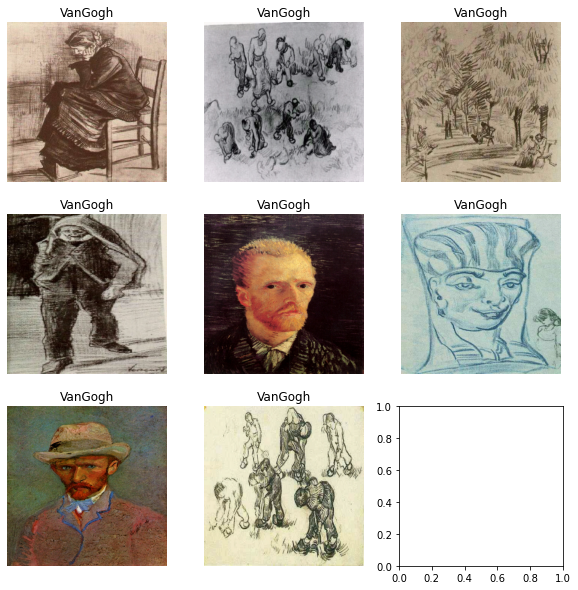

In [ ]:
#Visualize Data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
#Standarizing Data
normalization_layer = layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


# Creating a Convolutional Network Model

In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
#Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_12 (Rescaling)    (None, 500, 500, 3)       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 500, 500, 16)      448       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 250, 250, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 250, 250, 32)      4640      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 125, 125, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 125, 125, 64)    

## Train the model

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
190/190 [==============================] - 136s 713ms/step - loss: 0.4945 - accuracy: 0.9459 - val_loss: 0.3527 - val_accuracy: 0.9578
Epoch 2/10
190/190 [==============================] - 149s 782ms/step - loss: 0.1940 - accuracy: 0.9525 - val_loss: 0.2064 - val_accuracy: 0.9578
Epoch 3/10
190/190 [==============================] - 150s 791ms/step - loss: 0.2069 - accuracy: 0.9512 - val_loss: 0.1545 - val_accuracy: 0.9578
Epoch 4/10
190/190 [==============================] - 149s 784ms/step - loss: 0.1349 - accuracy: 0.9565 - val_loss: 0.2412 - val_accuracy: 0.9578
Epoch 5/10
190/190 [==============================] - 163s 859ms/step - loss: 0.1251 - accuracy: 0.9637 - val_loss: 0.1915 - val_accuracy: 0.9578
Epoch 6/10
190/190 [==============================] - 142s 750ms/step - loss: 0.0812 - accuracy: 0.9789 - val_loss: 0.2177 - val_accuracy: 0.9604
Epoch 7/10
190/190 [==============================] - 151s 797ms/step - loss: 0.0495 - accuracy: 0.9842 - val_loss: 0.3504 -

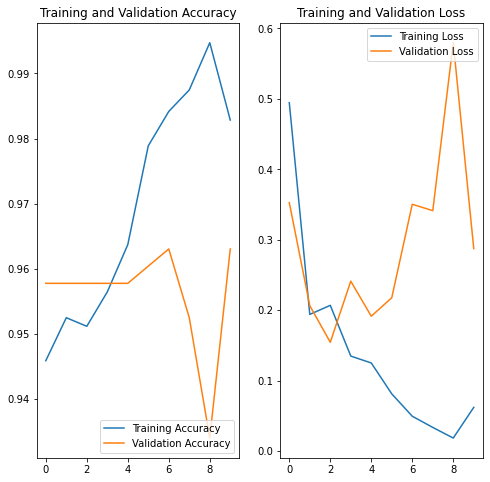

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Data Augmentation

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

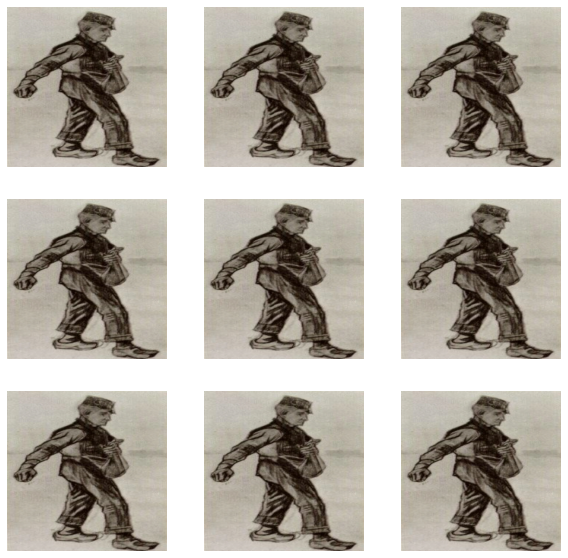

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")


In [ ]:
## Adding Drop-Out to the model
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_17 (Sequential)  (None, 180, 180, 3)       0         
                                                                 
 rescaling_10 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                

In [ ]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
190/190 [==============================] - 23s 118ms/step - loss: 1.2428 - accuracy: 0.9492 - val_loss: 0.4899 - val_accuracy: 0.9578
Epoch 2/15
190/190 [==============================] - 24s 127ms/step - loss: 0.3152 - accuracy: 0.9525 - val_loss: 0.3377 - val_accuracy: 0.9578
Epoch 3/15
190/190 [==============================] - 24s 127ms/step - loss: 0.3126 - accuracy: 0.9525 - val_loss: 0.2484 - val_accuracy: 0.9578
Epoch 4/15
190/190 [==============================] - 24s 128ms/step - loss: 0.2404 - accuracy: 0.9525 - val_loss: 0.2100 - val_accuracy: 0.9578
Epoch 5/15
190/190 [==============================] - 24s 126ms/step - loss: 0.4057 - accuracy: 0.9525 - val_loss: 0.1914 - val_accuracy: 0.9578
Epoch 6/15
190/190 [==============================] - 24s 127ms/step - loss: 0.1972 - accuracy: 0.9525 - val_loss: 0.1783 - val_accuracy: 0.9578
Epoch 7/15
190/190 [==============================] - 24s 128ms/step - loss: 0.1932 - accuracy: 0.9525 - val_loss: 0.1755 - val_ac

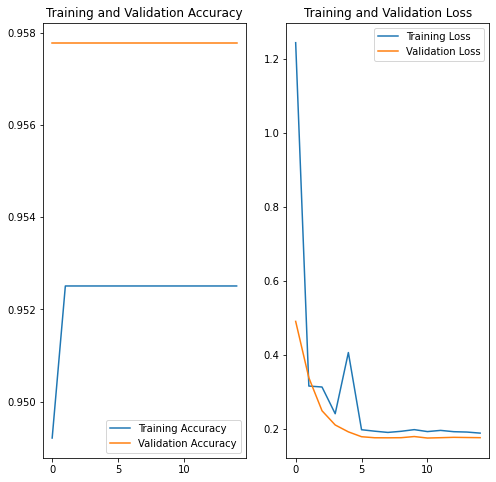

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
img = tf.keras.utils.load_img(
    'Examples/example1.jpg', target_size=(img_height, img_width)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)



This image most likely belongs to VanGogh with a 99.82 percent confidence.


<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.05076052, 0.9492395 ], dtype=float32)>